___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- Aplicar con éxito en la red neuronal a un problema de clasificación requiere que los valores de la red estén limitados en un rango de 0 y 1.
- Una transformación no lineal es incluída en el modelo de red neuronal. Usualmente esta transformación es una función sigmoidal. 

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

**Modelo matemático**

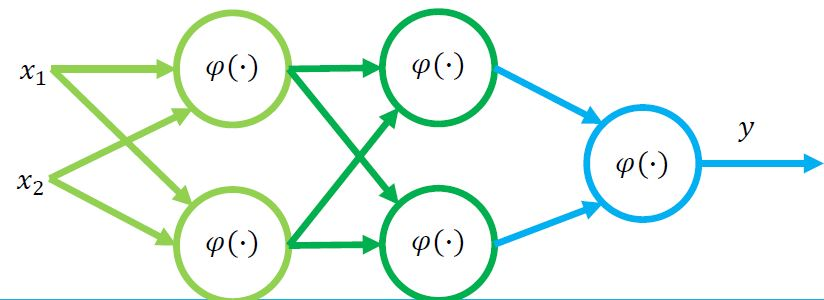

In [1]:
from IPython.display import Image
Image(filename='capa_oculta2.JPG', width=300, height=200)

<font color= #66CC00>$$\nu^{1} = w_{0}^{1}+w^{1}$$</font>
<font color= #66CC00>$$y^{1} = \varphi(\nu^{1})$$</font>
<font color= #009900>$$\nu^{2} = w_{0}^{2}+w^{2}y_{1}$$</font>
<font color= #009900>$$y^{2} = \varphi(\nu^{2})$$</font>
<font color= #3399FF>$$\nu^{3} = w_{0}^{3}+w^{3}y_{2}$$</font>
<font color= #3399FF>$$y^{3} = \varphi(\nu^{3})$$</font>

Para un problema de clasificación multiclase, el número de salidas aumenta en función del número de clases a clasificar

**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 0.9267 - accuracy: 0.3520
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9067 - accuracy: 0.3575
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8879 - accuracy: 0.3613
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8706 - accuracy: 0.3706
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8541 - accuracy: 0.3780
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8380 - accuracy: 0.3855
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8231 - accuracy: 0.3948
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8088 - accuracy: 0.4115
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7954 - accuracy: 0.4190
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7829 - accuracy: 0.4302
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 3ms/step - loss: 0.5312 - accuracy: 0.7337
Epoch 79/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.7356
Epoch 80/200
6/6 [==============================] - 0s 4ms/step - loss: 0.5291 - accuracy: 0.7356
Epoch 81/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5282 - accuracy: 0.7393
Epoch 82/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5271 - accuracy: 0.7393
Epoch 83/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7430
Epoch 84/200
6/6 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.7430
Epoch 85/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7430
Epoch 86/200
6/6 [==============================] - 0s 4ms/step - loss: 0.5233 - accuracy: 0.7430
Epoch 87/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7467
Epoch 88/200
6/6 [===============

6/6 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.7709
Epoch 162/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.7709
Epoch 163/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7691
Epoch 164/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4794 - accuracy: 0.7691
Epoch 165/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7691
Epoch 166/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4787 - accuracy: 0.7691
Epoch 167/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7691
Epoch 168/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.7691
Epoch 169/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.7691
Epoch 170/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.7691
Epoch 171/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

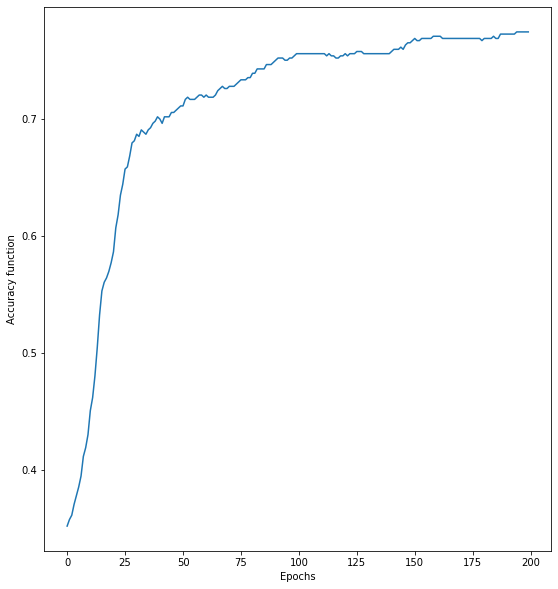

In [8]:
#Ver el performance del modelo en el entrenamiento
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [9]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")


In [10]:
Y_pred

array([[0.37623832],
       [0.14502132],
       [0.10720825],
       [0.1956819 ],
       [0.5452507 ],
       [0.6072592 ],
       [0.06219646],
       [0.4746719 ],
       [0.61470795],
       [0.6792119 ],
       [0.3221411 ],
       [0.77405703],
       [0.5836904 ],
       [0.31053248],
       [0.11064458],
       [0.39118892],
       [0.14002901],
       [0.10065225],
       [0.56869054],
       [0.5658453 ],
       [0.2552408 ],
       [0.11582786],
       [0.664111  ],
       [0.11277923],
       [0.6524956 ],
       [0.7579857 ],
       [0.11701351],
       [0.06499597],
       [0.275339  ],
       [0.15972355],
       [0.8215102 ],
       [0.73792094],
       [0.68989486],
       [0.66496927],
       [0.43235385],
       [0.72206604],
       [0.81931156],
       [0.22219977],
       [0.5920594 ],
       [0.5441176 ],
       [0.0882144 ],
       [0.58282727],
       [0.5359669 ],
       [0.392212  ],
       [0.06643683],
       [0.63188547],
       [0.70602983],
       [0.194

In [11]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [12]:
#Evaluar modelo
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

8/8 [==============================] - 0s 685us/step - loss: 0.5131 - accuracy: 0.7316
[0.5130653977394104, 0.7316017150878906]


In [13]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))


accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.773 	 0.696 	 0.622
  Test 	 0.732 	 0.605 	 0.650


In [14]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)
Yhat = model_log.predict(X_train)

accu_train = accuracy_score(Y_train,Yhat)
prec_train = precision_score(Y_train,Yhat)
reca_train = recall_score(Y_train,Yhat)

Yhat = model_log.predict(X_test)
accu_test = accuracy_score(Y_test,Yhat)
prec_test = precision_score(Y_test,Yhat)
reca_test = recall_score(Y_test,Yhat)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.782 	 0.741 	 0.580
  Test 	 0.736 	 0.617 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [15]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD


In [16]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [18]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
#creamos la variable target a dummies
dummy_y = np_utils.to_categorical(Y).astype(int)

In [21]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [22]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [26]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 1s 280ms/step - loss: 1.0230 - accuracy: 0.6750 - val_loss: 0.9161 - val_accuracy: 0.6333
Epoch 2/200
2/2 [==============================] - 0s 56ms/step - loss: 0.9145 - accuracy: 0.6250 - val_loss: 0.8393 - val_accuracy: 0.7667
Epoch 3/200
2/2 [==============================] - 0s 52ms/step - loss: 0.7969 - accuracy: 0.8000 - val_loss: 1.0661 - val_accuracy: 0.7000
Epoch 4/200
2/2 [==============================] - 0s 55ms/step - loss: 1.0563 - accuracy: 0.6500 - val_loss: 0.6992 - val_accuracy: 0.6000
Epoch 5/200
2/2 [==============================] - 0s 57ms/step - loss: 0.6697 - accuracy: 0.6500 - val_loss: 0.6631 - val_accuracy: 0.6333
Epoch 6/200
2/2 [==============================] - 0s 54ms/step - loss: 0.6244 - accuracy: 0.6750 - val_loss: 0.5742 - val_accuracy: 0.6000
Epoch 7/200
2/2 [==============================] - 0s 52ms/step - loss: 0.5594 - accuracy: 0.6667 - val_loss: 0.4946 - val_accuracy: 0.7000
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 107ms/step - loss: 0.1047 - accuracy: 0.9833 - val_loss: 0.1192 - val_accuracy: 1.0000
Epoch 60/200
2/2 [==============================] - 0s 102ms/step - loss: 0.1074 - accuracy: 0.9667 - val_loss: 0.0985 - val_accuracy: 1.0000
Epoch 61/200
2/2 [==============================] - 0s 49ms/step - loss: 0.1092 - accuracy: 0.9667 - val_loss: 0.2251 - val_accuracy: 0.8333
Epoch 62/200
2/2 [==============================] - 0s 61ms/step - loss: 0.2217 - accuracy: 0.9250 - val_loss: 0.2432 - val_accuracy: 0.8667
Epoch 63/200
2/2 [==============================] - 0s 52ms/step - loss: 0.1957 - accuracy: 0.9167 - val_loss: 0.1531 - val_accuracy: 0.9000
Epoch 64/200
2/2 [==============================] - 0s 48ms/step - loss: 0.1178 - accuracy: 0.9500 - val_loss: 0.0930 - val_accuracy: 1.0000
Epoch 65/200
2/2 [==============================] - 0s 72ms/step - loss: 0.1121 - accuracy: 0.9667 - val_loss: 0.1324 - val_accuracy: 0.9667
Epoch 66/200
2/2 [======

2/2 [==============================] - 0s 54ms/step - loss: 0.0861 - accuracy: 0.9750 - val_loss: 0.0657 - val_accuracy: 1.0000
Epoch 118/200
2/2 [==============================] - 0s 62ms/step - loss: 0.0732 - accuracy: 0.9750 - val_loss: 0.1416 - val_accuracy: 0.8667
Epoch 119/200
2/2 [==============================] - 0s 60ms/step - loss: 0.0940 - accuracy: 0.9500 - val_loss: 0.0652 - val_accuracy: 1.0000
Epoch 120/200
2/2 [==============================] - 0s 56ms/step - loss: 0.0760 - accuracy: 0.9750 - val_loss: 0.1118 - val_accuracy: 0.9667
Epoch 121/200
2/2 [==============================] - 0s 59ms/step - loss: 0.1357 - accuracy: 0.9500 - val_loss: 0.0634 - val_accuracy: 1.0000
Epoch 122/200
2/2 [==============================] - 0s 55ms/step - loss: 0.0724 - accuracy: 0.9833 - val_loss: 0.1898 - val_accuracy: 0.8667
Epoch 123/200
2/2 [==============================] - 0s 55ms/step - loss: 0.1131 - accuracy: 0.9500 - val_loss: 0.0669 - val_accuracy: 0.9667
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 55ms/step - loss: 0.1216 - accuracy: 0.9583 - val_loss: 0.0951 - val_accuracy: 0.9333
Epoch 176/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0801 - accuracy: 0.9667 - val_loss: 0.1788 - val_accuracy: 0.8667
Epoch 177/200
2/2 [==============================] - 0s 53ms/step - loss: 0.1119 - accuracy: 0.9500 - val_loss: 0.0813 - val_accuracy: 0.9667
Epoch 178/200
2/2 [==============================] - 0s 46ms/step - loss: 0.0986 - accuracy: 0.9667 - val_loss: 0.0672 - val_accuracy: 0.9667
Epoch 179/200
2/2 [==============================] - 0s 51ms/step - loss: 0.0828 - accuracy: 0.9750 - val_loss: 0.0936 - val_accuracy: 0.9333
Epoch 180/200
2/2 [==============================] - 0s 41ms/step - loss: 0.0739 - accuracy: 0.9667 - val_loss: 0.0621 - val_accuracy: 0.9667
Epoch 181/200
2/2 [==============================] - 0s 45ms/step - loss: 0.0766 - accuracy: 0.9750 - val_loss: 0.0622 - val_accuracy: 1.0000
Epoch 

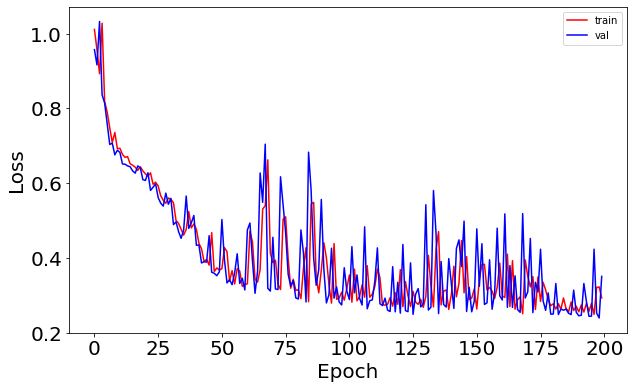

In [27]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [28]:
#Predecir con el modelo
#Y_pred = model.predict_classes(X)
#Y_prob = model.predict_proba(X)


Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

In [29]:
Y_pred

array([[7.73403747e-03, 9.85030472e-01, 7.23551214e-03],
       [9.99938011e-01, 5.80372216e-05, 3.93673463e-06],
       [7.57256931e-12, 5.15941792e-06, 9.99994874e-01],
       [6.18352881e-03, 9.82604325e-01, 1.12121077e-02],
       [9.00685508e-03, 9.85640526e-01, 5.35260793e-03],
       [9.99780476e-01, 2.08699479e-04, 1.09000130e-05],
       [1.18130455e-02, 9.82617795e-01, 5.56915719e-03],
       [2.10893893e-04, 3.93764853e-01, 6.06024265e-01],
       [1.29548041e-03, 8.40784192e-01, 1.57920361e-01],
       [9.00685508e-03, 9.85640526e-01, 5.35260793e-03],
       [5.53702004e-04, 6.32823884e-01, 3.66622359e-01],
       [9.98928845e-01, 1.03017874e-03, 4.09631648e-05],
       [9.99957681e-01, 3.95774805e-05, 2.73900719e-06],
       [9.99011040e-01, 9.50271671e-04, 3.86912070e-05],
       [9.99962926e-01, 3.42968378e-05, 2.70670830e-06],
       [9.00685508e-03, 9.85640526e-01, 5.35260793e-03],
       [4.00284428e-08, 1.55072950e-03, 9.98449206e-01],
       [9.00685508e-03, 9.85640

In [30]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [31]:
#Reverse
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [32]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [33]:
#Más métricas corregido
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')

Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.967 	 0.967 	 0.967
  Test 	 0.933 	 0.945 	 0.933


In [34]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
Yhat = model_log.predict(X_test)

accu_train = accuracy_score(y_train,model_log.predict(X_train))
prec_train = precision_score(y_train,model_log.predict(X_train),average='weighted')
reca_train = recall_score(y_train,model_log.predict(X_train),average='weighted')

accu_test = accuracy_score(y_test,model_log.predict(X_test))
prec_test = precision_score(y_test,model_log.predict(X_test),average='weighted')
reca_test = recall_score(y_test,model_log.predict(X_test),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.975 	 0.977 	 0.975
  Test 	 1.000 	 1.000 	 1.000
